In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [6]:
data = pd.read_csv('data/weatherAUS.csv')
data.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
data['RainTomorrow'].isnull().sum()

3267

In [5]:
data.dropna(subset=['RainTomorrow'], inplace=True)
data['RainTomorrow'].isnull().sum()

0

In [6]:
data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)

<AxesSubplot:>

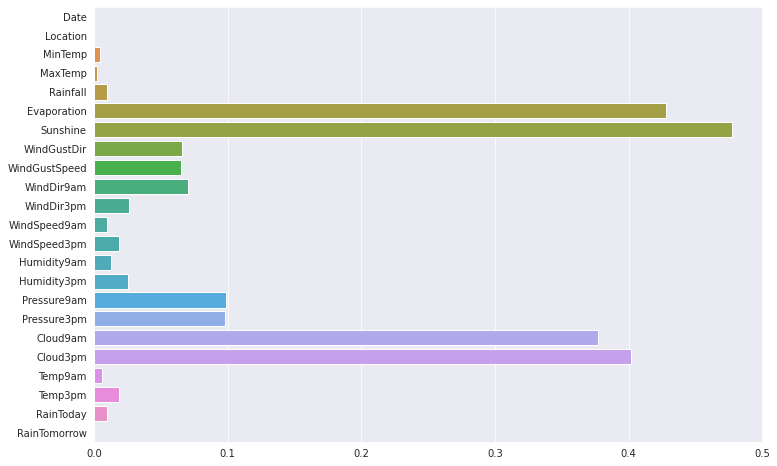

In [9]:
# plot ratio of missing values
sns.barplot(y=data.isnull().sum().index, x=data.isnull().mean().values)

In [10]:
a, b = data['RainTomorrow'].value_counts()
total_ratio = b / a
total_ratio

0.288960803509917

In [15]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features = numeric_features.loc[:, numeric_features.isna().sum() > 0]

nan_values = {}

for col in numeric_features.columns:
    if data[col].min() >= 0:
        nan_values[col] = -1
        data[col].fillna(nan_values[col], inplace=True)
    else:
        nan_values[col] = int(data[col].min()) - 1
        data[col].fillna(nan_values[col], inplace=True)

data[numeric_features.columns].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [73]:
nan_values

{'MinTemp': -9,
 'MaxTemp': -5,
 'Rainfall': -1,
 'Evaporation': -1,
 'Sunshine': -1,
 'WindGustSpeed': -1,
 'WindSpeed9am': -1,
 'WindSpeed3pm': -1,
 'Humidity9am': -1,
 'Humidity3pm': -1,
 'Pressure9am': -1,
 'Pressure3pm': -1,
 'Cloud9am': -1,
 'Cloud3pm': -1,
 'Temp9am': -8,
 'Temp3pm': -6}

In [ ]:
category_features = data.select_dtypes(include=[np.object])
category_features = category_features.loc[:, category_features.isnull().sum() > 0]



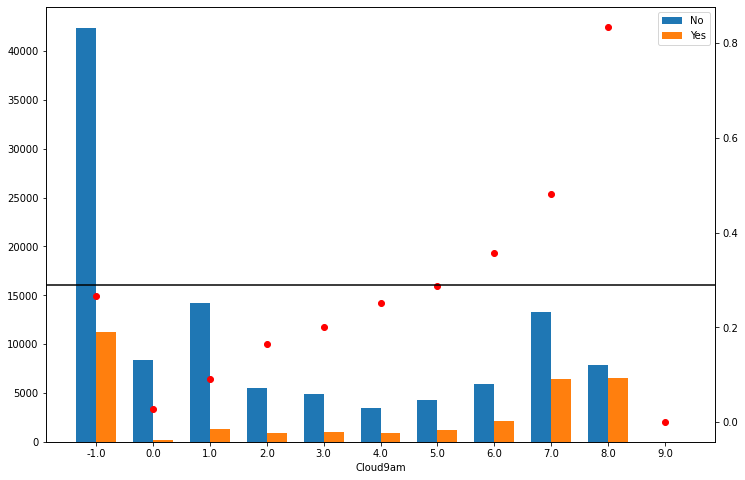

In [32]:
# data['Cloud9am'].replace(np.nan, -1, inplace=True)
# data['Cloud3pm'].replace(np.nan, -1, inplace=True)
# sns.countplot(data=data, x='Cloud3pm', hue='RainTomorrow')
bars = []
x = []
for i in data['Cloud9am'].unique():
    if np.isnan(i):
        filtered_data = data[data['Cloud9am'].isnull()]['RainTomorrow'].value_counts()
        no, yes = filtered_data.get(0, 0), filtered_data.get(1, 0)
    else:
        
        filtered_data = data[data['Cloud9am'] == i].value_counts('RainTomorrow')
        no, yes = filtered_data.get(0, 0), filtered_data.get(1, 0)
    bars.append([no, yes])
    x.append(-1 if np.isnan(i) else i)
    
bars = np.array(bars)
x = np.array(x)
plt.bar(x-0.35, bars[:, 0], 0.35, align='edge', label='No')
plt.bar(x, bars[:, 1], 0.35, align='edge', label='Yes')
plt.xlabel('Cloud9am')
plt.legend()

plt.twinx()
plt.scatter(x, bars[:, 1] / bars[:, 0], color='red', label='ratio')
plt.axhline(total_ratio, color='black', label='total ratio')

plt.xticks(x, x)

plt.show()
    

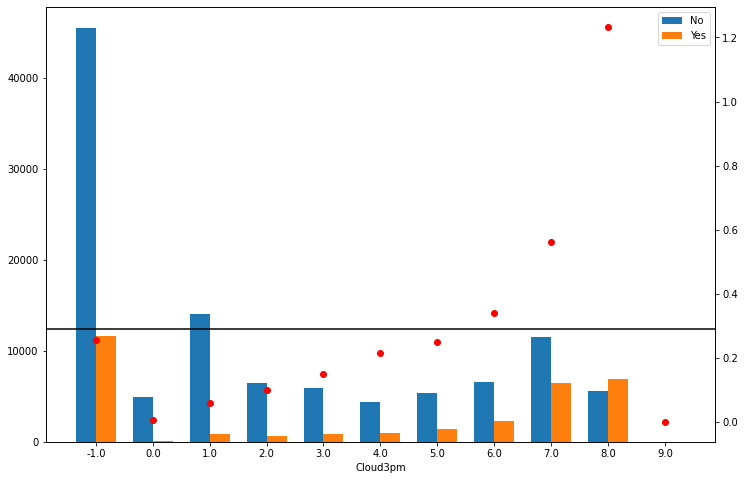

In [34]:
bars = []
x = []
for i in data['Cloud3pm'].unique():
    if np.isnan(i):
        filtered_data = data[data['Cloud3pm'].isnull()]['RainTomorrow'].value_counts()
        no, yes = filtered_data.get(0, 0), filtered_data.get(1, 0)
    else:
        
        filtered_data = data[data['Cloud3pm'] == i].value_counts('RainTomorrow')
        no, yes = filtered_data.get(0, 0), filtered_data.get(1, 0)
    bars.append([no, yes])
    x.append(-1 if np.isnan(i) else i)
    
bars = np.array(bars)
x = np.array(x)
plt.bar(x-0.35, bars[:, 0], 0.35, align='edge', label='No')
plt.bar(x, bars[:, 1], 0.35, align='edge', label='Yes')
plt.xlabel('Cloud3pm')
plt.legend()

plt.twinx()
plt.scatter(x, bars[:, 1] / bars[:, 0], color='red', label='ratio')
plt.axhline(total_ratio, color='black', label='total ratio')

plt.xticks(x, x)

plt.show()
    

nan's label distribution ~ total ratio  
=> there is no tendency

<AxesSubplot:xlabel='Sunshine', ylabel='Density'>

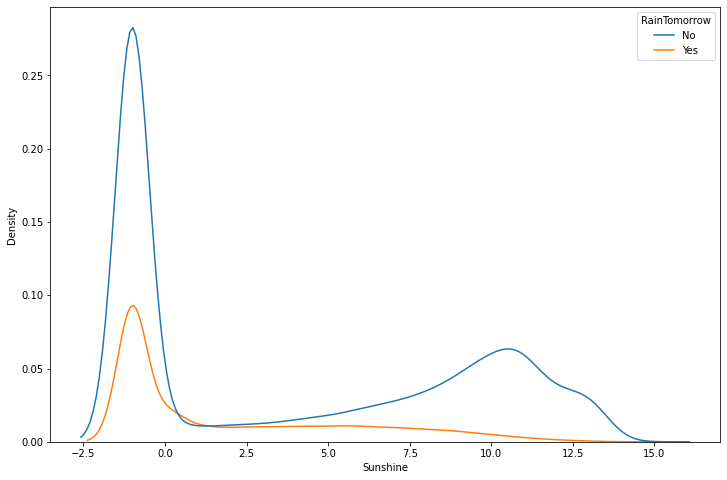

In [55]:
data['Sunshine'].replace(np.nan, -1, inplace=True)
sns.kdeplot(data=data, x='Sunshine', hue='RainTomorrow')

In [14]:
from collections import Counter

tmp = data.loc[:, ['Sunshine', 'RainTomorrow']].groupby('RainTomorrow').value_counts()
tmp


RainTomorrow  Sunshine
0             11.0        1041
              10.7        1034
              10.8        1010
              10.9         970
              10.5         962
                          ... 
1             13.2           4
              13.5           4
              13.8           4
              13.4           2
              13.9           1
Length: 283, dtype: int64

In [58]:
data['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

<AxesSubplot:xlabel='Evaporation', ylabel='Density'>

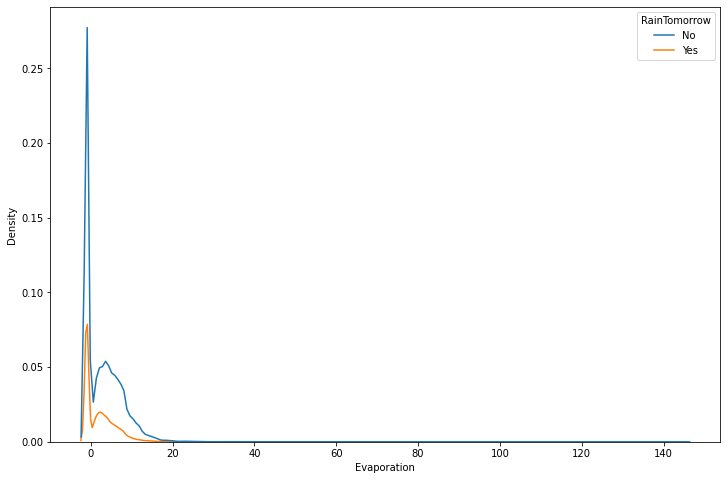

In [59]:
data['Evaporation'].replace(np.nan, -1, inplace=True)
sns.kdeplot(data=data, x='Evaporation', hue='RainTomorrow')

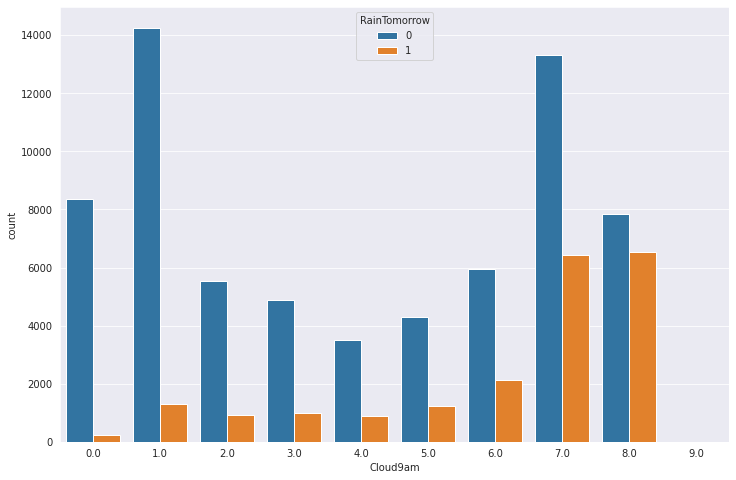

In [11]:
sns.countplot(data=data, x='Cloud9am', hue='RainTomorrow')
ax = plt.gca()

In [17]:
ax.axes.axes.axes.axes.bbox.height

434.88

In [19]:
ax.axes.bbox.height

434.88